## Projeto Breaking Bad Trends

In [49]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir("E:\FACULDADE\IQFC\Bibliotecas")
import data_filter as dtf

In [50]:
os.chdir("E:\FACULDADE\IQFC\Dados Indicadores")
df = pd.read_excel("indexes.xlsx")
df = dtf.data_filter(df)[["IBOV", "ITAG", "ICON", "SMLL", "DOLOF", "EUROBR", "CDI Acumulado", "IMA-B", "OZ1D"]].ffill().dropna()

In [51]:
mom3m = df.shift(1).pct_change().rolling(window=63).apply(lambda x: (x + 1).prod() - 1).dropna()
mom12m = df.shift(1).pct_change().rolling(window=252).apply(lambda x: (x + 1).prod() - 1).dropna()

### Tests

<AxesSubplot: xlabel='Data'>

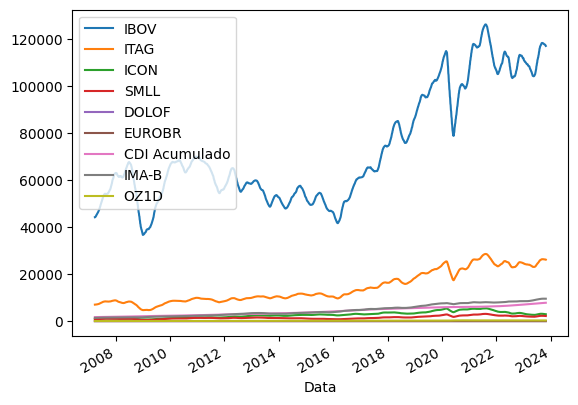

In [52]:
df.shift(1).rolling(window=63).apply(lambda x: (x).mean()).dropna().plot()

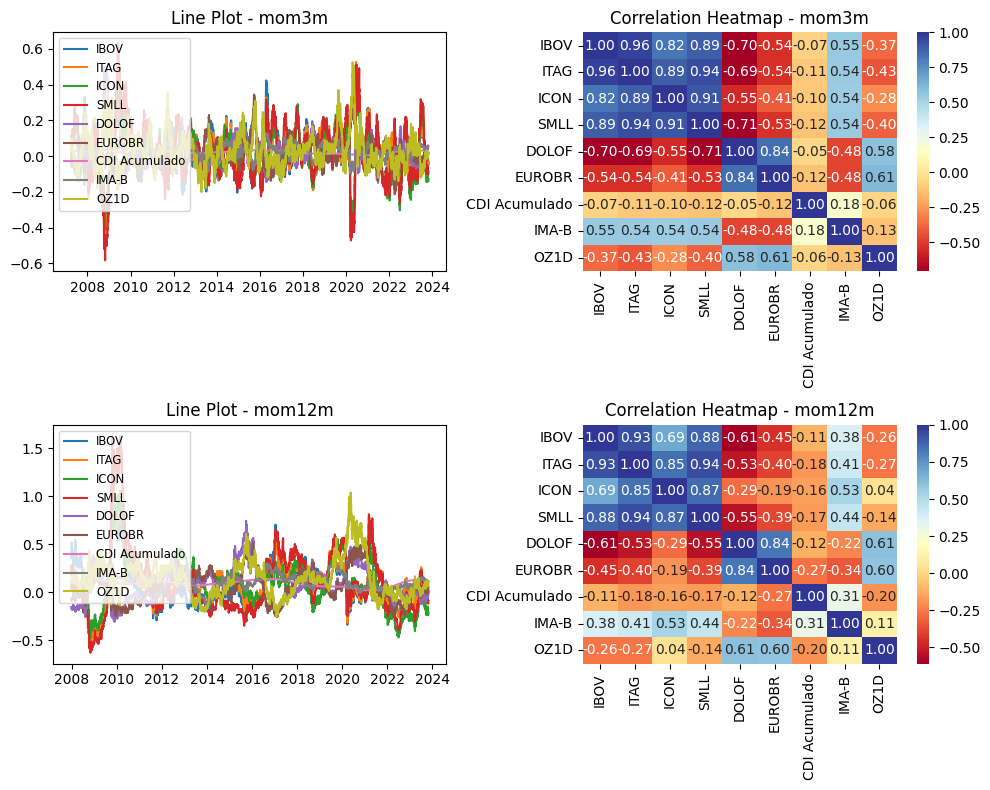

In [53]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

axes[0, 0].plot(mom3m)
axes[0, 0].set_title('Line Plot - mom3m')
axes[0, 0].legend( labels = mom3m.columns, loc = "upper left", fontsize = "small")
#
sns.heatmap(mom3m.corr(), annot=True, fmt='.2f', cmap='RdYlBu', ax=axes[0, 1])
axes[0, 1].set_title('Correlation Heatmap - mom3m')

axes[1, 0].plot(mom12m)
axes[1, 0].set_title('Line Plot - mom12m')
axes[1, 0].legend( labels = mom12m.columns, loc = "upper left", fontsize = "small")
#
sns.heatmap(mom12m.corr(), annot=True, fmt='.2f', cmap='RdYlBu', ax=axes[1, 1])
axes[1, 1].set_title('Correlation Heatmap - mom12m')

plt.tight_layout()
plt.show()
